In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

In [31]:
fs_9_df_orig = pd.read_csv('../data/fs_sept.csv')

fs_9_df_orig.BEGIN = pd.to_datetime(fs_9_df_orig.BEGIN)
fs_9_df_orig.END = pd.to_datetime(fs_9_df_orig.END, errors='coerce')

In [32]:
fs_9_df = fs_9_df_orig

In [33]:
fs_9_df = fs_9_df[(fs_9_df['BEGIN'] > '2021-09-03') & (fs_9_df['BEGIN'] < '2021-09-04')]
fs_9_df['USEDMEM'] = pd.to_numeric(fs_9_df['USEDMEM'].str[:-1], errors='coerce')
fs_9_df = fs_9_df.nlargest(10, 'USEDMEM')

C:\Users\georg\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [40]:
fs_9_df = fs_9_df.reset_index(drop=True);

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,31992881,COMPLETED,2021-09-03 09:04:15,2021-09-04 22:46:48,614400Mn,366189.14,6-08:00:00,1-13:42:33,1,16,production,0:0
1,31992880,COMPLETED,2021-09-03 09:04:15,2021-09-05 14:39:32,614400Mn,362450.87,6-08:00:00,2-05:35:17,1,16,production,0:0
2,31992878,COMPLETED,2021-09-03 09:03:14,2021-09-05 11:50:35,614400Mn,361919.94,6-08:00:00,2-02:47:21,1,16,production,0:0
3,31992867,COMPLETED,2021-09-03 09:03:14,2021-09-05 06:28:10,614400Mn,347273.82,6-08:00:00,1-21:24:56,1,16,production,0:0
4,31992792,COMPLETED,2021-09-03 08:59:14,2021-09-05 02:37:53,614400Mn,314169.59,6-08:00:00,1-17:38:39,1,16,production,0:0
5,31992865,COMPLETED,2021-09-03 09:03:14,2021-09-04 21:55:39,614400Mn,312058.56,6-08:00:00,1-12:52:25,1,16,production,0:0
6,31992866,COMPLETED,2021-09-03 09:03:14,2021-09-05 19:23:10,614400Mn,308862.11,6-08:00:00,2-10:19:56,1,16,production,0:0
7,31992864,COMPLETED,2021-09-03 09:03:14,2021-09-05 02:22:32,614400Mn,274911.34,6-08:00:00,1-17:19:18,1,16,production,0:0
8,31979978,COMPLETED,2021-09-03 05:27:45,2021-09-05 04:47:50,186648Mn,145053.16,2-00:00:00,1-23:20:05,1,32,nogpfs,0:0
9,31979945,COMPLETED,2021-09-03 05:18:12,2021-09-05 03:37:26,186648Mn,144999.53,2-00:00:00,1-22:19:14,1,32,nogpfs,0:0


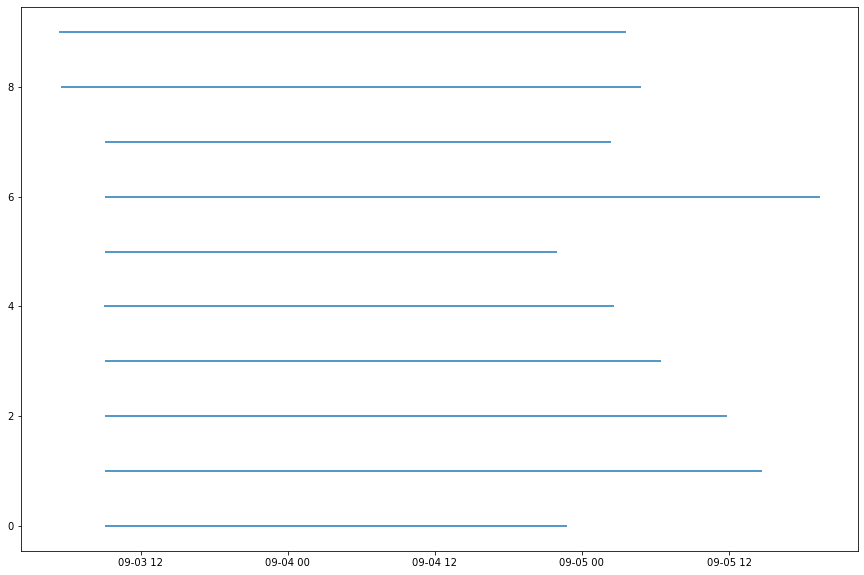

In [42]:
display(fs_9_df)
fig, ax = plt.subplots(figsize=(15, 10))
ax = ax.xaxis_date()
ax = plt.hlines(fs_9_df.index, dt.date2num(fs_9_df.BEGIN), dt.date2num(fs_9_df.END))